In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d
import math
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1.Perform UI calculations

## 1.1Importing tables for calculating the UI

In [2]:
# 1.Perform UI calculations
## 1.1Importing tables for calculating the UI
UI_index_2006 = pd.read_csv('data/UI_index_2006.csv')
UI_index_2010 = pd.read_csv('data/UI_index_2010.csv')
UI_index_2014 = pd.read_csv('data/UI_index_2014.csv')
UI_index_2018 = pd.read_csv('data/UI_index_2018.csv')
UI_index_2022 = pd.read_csv('data/UI_index_2022.csv')

In [3]:
combined_df = pd.concat([UI_index_2006, UI_index_2010, UI_index_2014, UI_index_2018, UI_index_2022], ignore_index=True)

In [4]:
combined_df

,Name_of_Regions,Year,Citycode,PUI,URI,LUI,EUI,EAL,LUL
0,Beijing,2006,110000.0,0.755995,0.006013,0.076454,0.9858,4797.490704,264.527306
1,Tianjin,2006,120000.0,0.601798,0.006653,0.045285,0.9696,3655.778262,297.691218
2,Shijiazhuang,2006,130100.0,0.402863,0.001466,0.012446,0.8613,1441.621852,283.814306
3,Tangshan,2006,130200.0,0.318862,0.001753,0.015144,0.8835,1710.704664,293.597938
4,Qinhuangdao,2006,130300.0,0.419655,0.001498,0.010603,0.8956,708.484215,264.204125
...,...,...,...,...,...,...,...,...,...
1449,固原,2022,640400.0,0.448000,0.000786,0.004282,0.8174,389.585709,232.605304
1450,中卫,2022,640500.0,0.508300,0.000429,0.002259,0.8585,412.914562,207.871637
1451,新疆,2022,650000.0,0.578900,0.000118,0.000876,0.8590,108.803216,66.331128
1452,乌鲁木齐,2022,650100.0,0.965000,0.004363,0.039520,0.9920,2822.446168,130.022680


## 1.2standardization

In [5]:
## 1.2standardization
# Select the columns to be standardized
columns_to_normalize = ['PUI', 'URI', 'LUI', 'EUI', 'EAL', 'LUL']
normalized_columns = ['X1_star', 'X2_star', 'X3_star', 'X4_star', 'X5_star', 'X6_star']

# Initialize columns for normalized values
for col in normalized_columns:
    combined_df[col] = pd.Series(dtype='float')

# Calculate the maximum and minimum values for the entire data set
max_vals = combined_df[columns_to_normalize].max()
min_vals = combined_df[columns_to_normalize].min()

# standardize
for col, norm_col in zip(columns_to_normalize, normalized_columns):
    combined_df[norm_col] = (combined_df[col] - min_vals[col]) / (max_vals[col] - min_vals[col])

In [6]:
combined_df

,Name_of_Regions,Year,Citycode,PUI,URI,LUI,EUI,EAL,LUL,X1_star,X2_star,X3_star,X4_star,X5_star,X6_star
0,Beijing,2006,110000.0,0.755995,0.006013,0.076454,0.9858,4797.490704,264.527306,0.736780,0.079646,0.154280,0.971060,0.028767,0.790721
1,Tianjin,2006,120000.0,0.601798,0.006653,0.045285,0.9696,3655.778262,297.691218,0.570440,0.088129,0.091329,0.937331,0.021918,0.901186
2,Shijiazhuang,2006,130100.0,0.402863,0.001466,0.012446,0.8613,1441.621852,283.814306,0.355840,0.019382,0.025005,0.711847,0.008634,0.854964
3,Tangshan,2006,130200.0,0.318862,0.001753,0.015144,0.8835,1710.704664,293.597938,0.265223,0.023174,0.030455,0.758068,0.010249,0.887552
4,Qinhuangdao,2006,130300.0,0.419655,0.001498,0.010603,0.8956,708.484215,264.204125,0.373954,0.019806,0.021284,0.783260,0.004236,0.789645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,固原,2022,640400.0,0.448000,0.000786,0.004282,0.8174,389.585709,232.605304,0.404531,0.010363,0.008516,0.620446,0.002323,0.684393
1450,中卫,2022,640500.0,0.508300,0.000429,0.002259,0.8585,412.914562,207.871637,0.469579,0.005632,0.004432,0.706017,0.002463,0.602009
1451,新疆,2022,650000.0,0.578900,0.000118,0.000876,0.8590,108.803216,66.331128,0.545739,0.001511,0.001638,0.707058,0.000638,0.130556
1452,乌鲁木齐,2022,650100.0,0.965000,0.004363,0.039520,0.9920,2822.446168,130.022680,0.962244,0.057772,0.079686,0.983968,0.016918,0.342704


In [7]:
# columns to be translated
columns_to_shift = ['X1_star', 'X2_star', 'X3_star', 'X4_star', 'X5_star', 'X6_star']

# Perform a panning operation on each column
for col in columns_to_shift:
    combined_df[col] = combined_df[col] + 0.0001

In [8]:
combined_df

,Name_of_Regions,Year,Citycode,PUI,URI,LUI,EUI,EAL,LUL,X1_star,X2_star,X3_star,X4_star,X5_star,X6_star
0,Beijing,2006,110000.0,0.755995,0.006013,0.076454,0.9858,4797.490704,264.527306,0.736880,0.079746,0.154380,0.971160,0.028867,0.790821
1,Tianjin,2006,120000.0,0.601798,0.006653,0.045285,0.9696,3655.778262,297.691218,0.570540,0.088229,0.091429,0.937431,0.022018,0.901286
2,Shijiazhuang,2006,130100.0,0.402863,0.001466,0.012446,0.8613,1441.621852,283.814306,0.355940,0.019482,0.025105,0.711947,0.008734,0.855064
3,Tangshan,2006,130200.0,0.318862,0.001753,0.015144,0.8835,1710.704664,293.597938,0.265323,0.023274,0.030555,0.758168,0.010349,0.887652
4,Qinhuangdao,2006,130300.0,0.419655,0.001498,0.010603,0.8956,708.484215,264.204125,0.374054,0.019906,0.021384,0.783360,0.004336,0.789745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,固原,2022,640400.0,0.448000,0.000786,0.004282,0.8174,389.585709,232.605304,0.404631,0.010463,0.008616,0.620546,0.002423,0.684493
1450,中卫,2022,640500.0,0.508300,0.000429,0.002259,0.8585,412.914562,207.871637,0.469679,0.005732,0.004532,0.706117,0.002563,0.602109
1451,新疆,2022,650000.0,0.578900,0.000118,0.000876,0.8590,108.803216,66.331128,0.545839,0.001611,0.001738,0.707158,0.000738,0.130656
1452,乌鲁木齐,2022,650100.0,0.965000,0.004363,0.039520,0.9920,2822.446168,130.022680,0.962344,0.057872,0.079786,0.984068,0.017018,0.342804


# 1.3Weights were calculated using entropy weights for multi-year panel data

In [9]:
# 1.3Weights were calculated using entropy weights for multi-year panel data
def calculate_entropy(indicator_data):
    # Replace zero values to avoid log(0) and negative infinity in entropy calculation
    indicator_data = indicator_data.replace(0, np.finfo(float).eps)  # Use a small number instead of zero
    p_ij = indicator_data / indicator_data.sum()  # Calculate the proportion p_ij
    K = 1 / np.log(len(indicator_data))  # Calculate the constant K
    e_j = -K * (p_ij * np.log(p_ij)).sum()  # Calculate the entropy e_j
    return e_j

columns = ['X1_star', 'X2_star', 'X3_star', 'X4_star', 'X5_star', 'X6_star']
# Calculate the entropy value for each metric
entropies = combined_df[columns].apply(calculate_entropy, axis=0)
# Calculate the weights and make sure they sum to 1
weights = (1 - entropies) / (1 - entropies).sum()
# Initialize a new DataFrame for storing weighted values
weighted_df = combined_df.copy()
# Calculate weighted values for each indicator in each row
for i, indicator in enumerate(columns):
    weighted_df[indicator + '_weighted'] = combined_df[indicator] * weights.values[i]

print("Weights:", weights)
UI = weighted_df

Weights: X1_star    0.033678
X2_star    0.314584
X3_star    0.299686
X4_star    0.011440
X5_star    0.332925
X6_star    0.007687
dtype: float64


In [10]:
UI

,Name_of_Regions,Year,Citycode,PUI,URI,LUI,EUI,EAL,LUL,X1_star,...,X3_star,X4_star,X5_star,X6_star,X1_star_weighted,X2_star_weighted,X3_star_weighted,X4_star_weighted,X5_star_weighted,X6_star_weighted
0,Beijing,2006,110000.0,0.755995,0.006013,0.076454,0.9858,4797.490704,264.527306,0.736880,...,0.154380,0.971160,0.028867,0.790821,0.024817,0.025087,0.046266,0.011110,0.009611,0.006079
1,Tianjin,2006,120000.0,0.601798,0.006653,0.045285,0.9696,3655.778262,297.691218,0.570540,...,0.091429,0.937431,0.022018,0.901286,0.019215,0.027755,0.027400,0.010724,0.007330,0.006928
2,Shijiazhuang,2006,130100.0,0.402863,0.001466,0.012446,0.8613,1441.621852,283.814306,0.355940,...,0.025105,0.711947,0.008734,0.855064,0.011987,0.006129,0.007524,0.008145,0.002908,0.006573
3,Tangshan,2006,130200.0,0.318862,0.001753,0.015144,0.8835,1710.704664,293.597938,0.265323,...,0.030555,0.758168,0.010349,0.887652,0.008936,0.007322,0.009157,0.008673,0.003445,0.006823
4,Qinhuangdao,2006,130300.0,0.419655,0.001498,0.010603,0.8956,708.484215,264.204125,0.374054,...,0.021384,0.783360,0.004336,0.789745,0.012597,0.006262,0.006408,0.008962,0.001444,0.006071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,固原,2022,640400.0,0.448000,0.000786,0.004282,0.8174,389.585709,232.605304,0.404631,...,0.008616,0.620546,0.002423,0.684493,0.013627,0.003292,0.002582,0.007099,0.000807,0.005262
1450,中卫,2022,640500.0,0.508300,0.000429,0.002259,0.8585,412.914562,207.871637,0.469679,...,0.004532,0.706117,0.002563,0.602109,0.015818,0.001803,0.001358,0.008078,0.000853,0.004628
1451,新疆,2022,650000.0,0.578900,0.000118,0.000876,0.8590,108.803216,66.331128,0.545839,...,0.001738,0.707158,0.000738,0.130656,0.018383,0.000507,0.000521,0.008090,0.000246,0.001004
1452,乌鲁木齐,2022,650100.0,0.965000,0.004363,0.039520,0.9920,2822.446168,130.022680,0.962344,...,0.079786,0.984068,0.017018,0.342804,0.032410,0.018206,0.023911,0.011258,0.005666,0.002635


In [11]:
# Calculate the combined weighted values for Resistance, Adaptability, and Recovery
UI['PU'] = UI['X1_star_weighted'] + UI['X2_star_weighted']
UI['LU'] = UI['X3_star_weighted'] + UI['X6_star_weighted']
UI['EU'] = UI['X4_star_weighted'] + UI['X5_star_weighted']

# Assuming data_merged is the DataFrame with the standardized 'RES', 'ADA', and 'REC' columns.

# Define a small positive value to add to REC to avoid zero values
small_positive_value = 1e-6

# Replace zero values in REC with the small positive value
UI['PU_adj'] = UI['PU'].replace(0, small_positive_value)
UI['LU_adj'] = UI['LU'].replace(0, small_positive_value)
UI['EU_adj'] = UI['EU'].replace(0, small_positive_value)

# Now, the UER values should not be zero due to REC being zero, since we have adjusted REC values slightly above zero.

# Calculate the Urban Ecological Resilience (UER) for each borough and year
UI['UI'] = UI['PU_adj'] + UI['LU_adj'] + UI['EU_adj']

# Check the result
UI[['Year', 'Name_of_Regions', 'PU', 'LU', 'EU', 'UI']].head()

,Year,Name_of_Regions,PU,LU,EU,UI
0,2006,Beijing,0.049904,0.052345,0.020721,0.122969
1,2006,Tianjin,0.046970,0.034328,0.018054,0.099353
2,2006,Shijiazhuang,0.018116,0.014096,0.011053,0.043265
3,2006,Tangshan,0.016257,0.015980,0.012119,0.044356
4,2006,Qinhuangdao,0.018860,0.012479,0.010405,0.041744


## 1.4 Visualization of the UI

In [12]:
UI

,Name_of_Regions,Year,Citycode,PUI,URI,LUI,EUI,EAL,LUL,X1_star,...,X4_star_weighted,X5_star_weighted,X6_star_weighted,PU,LU,EU,PU_adj,LU_adj,EU_adj,UI
0,Beijing,2006,110000.0,0.755995,0.006013,0.076454,0.9858,4797.490704,264.527306,0.736880,...,0.011110,0.009611,0.006079,0.049904,0.052345,0.020721,0.049904,0.052345,0.020721,0.122969
1,Tianjin,2006,120000.0,0.601798,0.006653,0.045285,0.9696,3655.778262,297.691218,0.570540,...,0.010724,0.007330,0.006928,0.046970,0.034328,0.018054,0.046970,0.034328,0.018054,0.099353
2,Shijiazhuang,2006,130100.0,0.402863,0.001466,0.012446,0.8613,1441.621852,283.814306,0.355940,...,0.008145,0.002908,0.006573,0.018116,0.014096,0.011053,0.018116,0.014096,0.011053,0.043265
3,Tangshan,2006,130200.0,0.318862,0.001753,0.015144,0.8835,1710.704664,293.597938,0.265323,...,0.008673,0.003445,0.006823,0.016257,0.015980,0.012119,0.016257,0.015980,0.012119,0.044356
4,Qinhuangdao,2006,130300.0,0.419655,0.001498,0.010603,0.8956,708.484215,264.204125,0.374054,...,0.008962,0.001444,0.006071,0.018860,0.012479,0.010405,0.018860,0.012479,0.010405,0.041744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,固原,2022,640400.0,0.448000,0.000786,0.004282,0.8174,389.585709,232.605304,0.404631,...,0.007099,0.000807,0.005262,0.016919,0.007844,0.007906,0.016919,0.007844,0.007906,0.032668
1450,中卫,2022,640500.0,0.508300,0.000429,0.002259,0.8585,412.914562,207.871637,0.469679,...,0.008078,0.000853,0.004628,0.017621,0.005987,0.008931,0.017621,0.005987,0.008931,0.032539
1451,新疆,2022,650000.0,0.578900,0.000118,0.000876,0.8590,108.803216,66.331128,0.545839,...,0.008090,0.000246,0.001004,0.018890,0.001525,0.008336,0.018890,0.001525,0.008336,0.028750
1452,乌鲁木齐,2022,650100.0,0.965000,0.004363,0.039520,0.9920,2822.446168,130.022680,0.962344,...,0.011258,0.005666,0.002635,0.050616,0.026546,0.016924,0.050616,0.026546,0.016924,0.094085


In [13]:
UI['log_UI'] = np.log(UI['UI'])

<Figure size 1200x600 with 0 Axes>

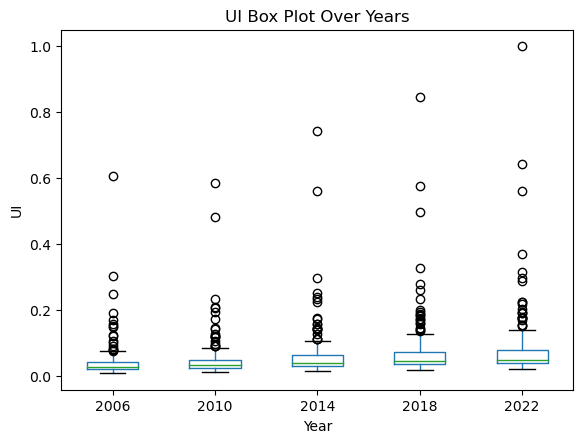

In [14]:
# Plotting UI box lines
plt.figure(figsize=(12, 6))
boxplot = UI.boxplot(column='UI', by='Year', grid=False)
plt.title('UI Box Plot Over Years')
plt.suptitle('')
plt.xlabel('Year')
plt.ylabel('UI')
plt.show()

# 2. Import of UER calculation files

In [15]:
UER_index_2006 = pd.read_csv('data/UER_index_2006.csv')
UER_index_2010 = pd.read_csv('data/UER_index_2010.csv')
UER_index_2014 = pd.read_csv('data/UER_index_2014.csv')
UER_index_2018 = pd.read_csv('data/UER_index_2018.csv')
UER_index_2022 = pd.read_csv('data/UER_index_2022.csv')

In [16]:
combined_UER = pd.concat([UER_index_2006, UER_index_2010, UER_index_2014, UER_index_2018, UER_index_2022], ignore_index=True)

In [17]:
combined_UER

,Name_of_Regions,Citycode,Year,Res1,Res2,Ada1,Ada2,Rec1,Rec2
0,Beijing,110000.0,2006,0.000129,0.000186,80.790000,74.57,44.34,10.68
1,Tianjin,120000.0,2006,0.000527,0.001535,98.410000,85.06,5.55,6.59
2,Shijiazhuang,130100.0,2006,0.001194,0.004276,95.840000,100.00,36.15,8.24
3,Tangshan,130200.0,2006,0.001216,0.006072,61.640000,98.90,42.17,8.95
4,Qinhuangdao,130300.0,2006,0.000998,0.002851,91.940000,100.00,42.70,8.29
...,...,...,...,...,...,...,...,...,...
1449,固原,640400.0,2022,0.000025,0.000223,66.380000,100.00,41.99,32.10
1450,中卫,640500.0,2022,0.000186,0.000835,64.740000,100.00,43.99,23.68
1451,新疆,650000.0,2022,0.000081,0.002391,41.867498,100.00,41.17,14.93
1452,乌鲁木齐,650100.0,2022,0.000076,0.000418,89.420000,100.00,39.73,13.17


In [18]:
## 2.2standardization
# Select the columns to be normalized and the corresponding column names
columns_to_normalize = {
    'Res1': 'X1_star',
    'Res2': 'X2_star',
    'Ada1': 'X3_star',
    'Ada2': 'X4_star',
    'Rec1': 'X5_star',
    'Rec2': 'X6_star'
}

# Initialize standardized columns
for new_col in columns_to_normalize.values():
    combined_UER[new_col] = pd.Series(dtype='float')

# Calculate the maximum and minimum values for the entire data set
max_vals = combined_UER[list(columns_to_normalize.keys())].max()
min_vals = combined_UER[list(columns_to_normalize.keys())].min()

# Application of standardized formulas
for col, norm_col in columns_to_normalize.items():
    if col in ['Res1', 'Res2']:  # Negative indicators
        combined_UER[norm_col] = (max_vals[col] - combined_UER[col]) / (max_vals[col] - min_vals[col])
    else:  # Positive indicators
        combined_UER[norm_col] = (combined_UER[col] - min_vals[col]) / (max_vals[col] - min_vals[col])

In [19]:
combined_UER

,Name_of_Regions,Citycode,Year,Res1,Res2,Ada1,Ada2,Rec1,Rec2,X1_star,X2_star,X3_star,X4_star,X5_star,X6_star
0,Beijing,110000.0,2006,0.000129,0.000186,80.790000,74.57,44.34,10.68,0.992452,0.996846,0.536383,0.472141,0.465512,0.142305
1,Tianjin,120000.0,2006,0.000527,0.001535,98.410000,85.06,5.55,6.59,0.969211,0.973984,0.653366,0.538559,0.058268,0.087808
2,Shijiazhuang,130100.0,2006,0.001194,0.004276,95.840000,100.00,36.15,8.24,0.930265,0.927530,0.636303,0.633152,0.379528,0.109793
3,Tangshan,130200.0,2006,0.001216,0.006072,61.640000,98.90,42.17,8.95,0.929001,0.897091,0.409242,0.626187,0.442730,0.119254
4,Qinhuangdao,130300.0,2006,0.000998,0.002851,91.940000,100.00,42.70,8.29,0.941723,0.951682,0.610410,0.633152,0.448294,0.110460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,固原,640400.0,2022,0.000025,0.000223,66.380000,100.00,41.99,32.10,0.998518,0.996222,0.440712,0.633152,0.440840,0.427715
1450,中卫,640500.0,2022,0.000186,0.000835,64.740000,100.00,43.99,23.68,0.989136,0.985851,0.429823,0.633152,0.461837,0.315523
1451,新疆,650000.0,2022,0.000081,0.002391,41.867498,100.00,41.17,14.93,0.995257,0.959485,0.277968,0.633152,0.432231,0.198934
1452,乌鲁木齐,650100.0,2022,0.000076,0.000418,89.420000,100.00,39.73,13.17,0.995577,0.992923,0.593679,0.633152,0.417113,0.175483


In [20]:
# columns to be translated
columns_to_shift = ['X1_star', 'X2_star', 'X3_star', 'X4_star', 'X5_star', 'X6_star']

# Perform a panning operation on each column
for col in columns_to_shift:
    combined_UER[col] = combined_UER[col] + 0.0001

In [21]:
# 2.3Weights were calculated using entropy weights for multi-year panel data
def calculate_entropy(indicator_data):
    # Replace zero values to avoid log(0) and negative infinity in entropy calculation
    indicator_data = indicator_data.replace(0, np.finfo(float).eps)  # Use a small number instead of zero
    p_ij = indicator_data / indicator_data.sum()  # Calculate the proportion p_ij
    K = 1 / np.log(len(indicator_data))  # Calculate the constant K
    e_j = -K * (p_ij * np.log(p_ij)).sum()  # Calculate the entropy e_j
    return e_j

# Columns to process
columns = ['X1_star', 'X2_star', 'X3_star', 'X4_star', 'X5_star', 'X6_star']

# Calculate the entropy value for each metric
entropies = combined_UER[columns].apply(calculate_entropy, axis=0)

# Calculate the weights and make sure they sum to 1
weights = (1 - entropies) / (1 - entropies).sum()

# Initialize a new DataFrame for storing weighted values
weighted_df = combined_UER.copy()

# Calculate weighted values for each indicator in each row
for i, indicator in enumerate(columns):
    weighted_df[indicator + '_weighted'] = combined_UER[indicator] * weights.values[i]

print("Weights:", weights)
UER = weighted_df

Weights: X1_star    0.008056
X2_star    0.016018
X3_star    0.238940
X4_star    0.303342
X5_star    0.113917
X6_star    0.319727
dtype: float64


In [22]:
UER

,Name_of_Regions,Citycode,Year,Res1,Res2,Ada1,Ada2,Rec1,Rec2,X1_star,...,X3_star,X4_star,X5_star,X6_star,X1_star_weighted,X2_star_weighted,X3_star_weighted,X4_star_weighted,X5_star_weighted,X6_star_weighted
0,Beijing,110000.0,2006,0.000129,0.000186,80.790000,74.57,44.34,10.68,0.992552,...,0.536483,0.472241,0.465612,0.142405,0.007996,0.015969,0.128187,0.143251,0.053041,0.045531
1,Tianjin,120000.0,2006,0.000527,0.001535,98.410000,85.06,5.55,6.59,0.969311,...,0.653466,0.538659,0.058368,0.087908,0.007809,0.015603,0.156139,0.163398,0.006649,0.028107
2,Shijiazhuang,130100.0,2006,0.001194,0.004276,95.840000,100.00,36.15,8.24,0.930365,...,0.636403,0.633252,0.379628,0.109893,0.007495,0.014858,0.152062,0.192092,0.043246,0.035136
3,Tangshan,130200.0,2006,0.001216,0.006072,61.640000,98.90,42.17,8.95,0.929101,...,0.409342,0.626287,0.442830,0.119354,0.007485,0.014371,0.097808,0.189979,0.050446,0.038161
4,Qinhuangdao,130300.0,2006,0.000998,0.002851,91.940000,100.00,42.70,8.29,0.941823,...,0.610510,0.633252,0.448394,0.110560,0.007588,0.015245,0.145875,0.192092,0.051080,0.035349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,固原,640400.0,2022,0.000025,0.000223,66.380000,100.00,41.99,32.10,0.998618,...,0.440812,0.633252,0.440940,0.427815,0.008045,0.015959,0.105328,0.192092,0.050231,0.136784
1450,中卫,640500.0,2022,0.000186,0.000835,64.740000,100.00,43.99,23.68,0.989236,...,0.429923,0.633252,0.461937,0.315623,0.007970,0.015793,0.102726,0.192092,0.052623,0.100913
1451,新疆,650000.0,2022,0.000081,0.002391,41.867498,100.00,41.17,14.93,0.995357,...,0.278068,0.633252,0.432331,0.199034,0.008019,0.015370,0.066442,0.192092,0.049250,0.063637
1452,乌鲁木齐,650100.0,2022,0.000076,0.000418,89.420000,100.00,39.73,13.17,0.995677,...,0.593779,0.633252,0.417213,0.175583,0.008022,0.015906,0.141878,0.192092,0.047528,0.056139


In [23]:
# Calculate the combined weighted values for Resistance, Adaptability, and Recovery
UER['RES'] = UER['X1_star_weighted'] + UER['X2_star_weighted']
UER['ADA'] = UER['X3_star_weighted'] + UER['X4_star_weighted']
#comprehensive_scores['ADA'] = comprehensive_scores['X2_star_weighted'] 
UER['REC'] = UER['X5_star_weighted'] + UER['X6_star_weighted']

# Assuming data_merged is the DataFrame with the standardized 'RES', 'ADA', and 'REC' columns.

# Define a small positive value to add to REC to avoid zero values
small_positive_value = 1e-6

# Replace zero values in REC with the small positive value
UER['REC_adj'] = UER['REC'].replace(0, small_positive_value)
UER['ADA_adj'] = UER['ADA'].replace(0, small_positive_value)
UER['RES_adj'] = UER['RES'].replace(0, small_positive_value)

# Now, the UER values should not be zero due to REC being zero, since we have adjusted REC values slightly above zero.

# Calculate the Urban Ecological Resilience (UER) for each borough and year
UER['UER'] = (UER['RES_adj'] * UER['ADA_adj'] * UER['REC_adj']) ** (1/3)
#UER['UER'] = UER['RES_adj'] + UER['ADA_adj'] + UER['REC_adj']
# Check the result
UER[['Year', 'Name_of_Regions', 'RES', 'ADA', 'REC', 'UER']].head()

,Year,Name_of_Regions,RES,ADA,REC,UER
0,2006,Beijing,0.023965,0.271438,0.098572,0.086232
1,2006,Tianjin,0.023412,0.319537,0.034756,0.063825
2,2006,Shijiazhuang,0.022354,0.344154,0.078382,0.084484
3,2006,Tangshan,0.021856,0.287787,0.088606,0.082294
4,2006,Qinhuangdao,0.022833,0.337967,0.086429,0.087370


In [24]:
UER

,Name_of_Regions,Citycode,Year,Res1,Res2,Ada1,Ada2,Rec1,Rec2,X1_star,...,X4_star_weighted,X5_star_weighted,X6_star_weighted,RES,ADA,REC,REC_adj,ADA_adj,RES_adj,UER
0,Beijing,110000.0,2006,0.000129,0.000186,80.790000,74.57,44.34,10.68,0.992552,...,0.143251,0.053041,0.045531,0.023965,0.271438,0.098572,0.098572,0.271438,0.023965,0.086232
1,Tianjin,120000.0,2006,0.000527,0.001535,98.410000,85.06,5.55,6.59,0.969311,...,0.163398,0.006649,0.028107,0.023412,0.319537,0.034756,0.034756,0.319537,0.023412,0.063825
2,Shijiazhuang,130100.0,2006,0.001194,0.004276,95.840000,100.00,36.15,8.24,0.930365,...,0.192092,0.043246,0.035136,0.022354,0.344154,0.078382,0.078382,0.344154,0.022354,0.084484
3,Tangshan,130200.0,2006,0.001216,0.006072,61.640000,98.90,42.17,8.95,0.929101,...,0.189979,0.050446,0.038161,0.021856,0.287787,0.088606,0.088606,0.287787,0.021856,0.082294
4,Qinhuangdao,130300.0,2006,0.000998,0.002851,91.940000,100.00,42.70,8.29,0.941823,...,0.192092,0.051080,0.035349,0.022833,0.337967,0.086429,0.086429,0.337967,0.022833,0.087370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,固原,640400.0,2022,0.000025,0.000223,66.380000,100.00,41.99,32.10,0.998618,...,0.192092,0.050231,0.136784,0.024004,0.297419,0.187014,0.187014,0.297419,0.024004,0.110114
1450,中卫,640500.0,2022,0.000186,0.000835,64.740000,100.00,43.99,23.68,0.989236,...,0.192092,0.052623,0.100913,0.023762,0.294818,0.153536,0.153536,0.294818,0.023762,0.102459
1451,新疆,650000.0,2022,0.000081,0.002391,41.867498,100.00,41.17,14.93,0.995357,...,0.192092,0.049250,0.063637,0.023389,0.258533,0.112886,0.112886,0.258533,0.023389,0.088049
1452,乌鲁木齐,650100.0,2022,0.000076,0.000418,89.420000,100.00,39.73,13.17,0.995677,...,0.192092,0.047528,0.056139,0.023927,0.333970,0.103666,0.103666,0.333970,0.023927,0.093918


## 2.4 Visualization of the UI

<Figure size 1200x600 with 0 Axes>

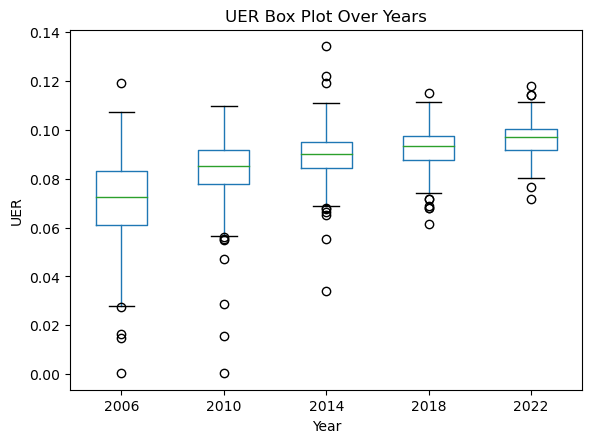

In [25]:
# Plotting UER box lines
plt.figure(figsize=(12, 6))
boxplot = UER.boxplot(column='UER', by='Year', grid=False)
plt.title('UER Box Plot Over Years')
plt.suptitle('')
plt.xlabel('Year')
plt.ylabel('UER')
plt.show()

# 3. Calculation of coupling coordination values for UI and UI using the coupling coordination model

## 3.1 Merge UI and UER forms

In [26]:
UI_subset = UI[['Name_of_Regions', 'Year', 'Citycode', 'UI']]
UER_subset = UER[['Name_of_Regions', 'Citycode', 'Year', 'UER']]

In [27]:
merged_df = pd.merge(UI_subset, UER_subset, on=['Year', 'Citycode'], how='inner')

In [28]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name_of_Regions_x  1452 non-null   object 
 1   Year               1452 non-null   int64  
 2   Citycode           1452 non-null   float64
 3   UI                 1452 non-null   float64
 4   Name_of_Regions_y  1452 non-null   object 
 5   UER                1452 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 68.2+ KB


In [29]:
# Left-join merge, retaining all rows in the UER dataset
left_merged_df = pd.merge(UER_subset, merged_df, on=['Year', 'Citycode'], how='left', indicator=True)

# Filtering out non-existent rows in merged_df
missing_rows = left_merged_df[left_merged_df['_merge'] == 'left_only']
missing_rows

,Name_of_Regions,Citycode,Year,UER_x,Name_of_Regions_x,UI,Name_of_Regions_y,UER_y,_merge
104,Chaohu,NaN,2006,0.050716,NaN,NaN,NaN,NaN,left_only
140,Iaiwu,NaN,2006,0.088403,NaN,NaN,NaN,NaN,left_only


## 3.2 Calculate the coupling coordination value

In [30]:
# Perform raw-value coupling harmonization calculations
def calculate_C(UI, UER):
    return np.sqrt((UI * UER) / ((UI + UER) / 2)**2)

def calculate_T(UI, UER, mu1=0.5, mu2=0.5):
    return mu1 * UI + mu2 * UER

def calculate_D(C, T):
    return np.sqrt(C * T)

# Calculating C-coupling
merged_df['C'] = merged_df.apply(lambda row: calculate_C(row['UI'], row['UER']), axis=1)

# Calculation of T-coordination
merged_df['T'] = merged_df.apply(lambda row: calculate_T(row['UI'], row['UER']), axis=1)

# Calculate the D-coupling coordination degree
merged_df['D'] = merged_df.apply(lambda row: calculate_D(row['C'], row['T']), axis=1)

In [31]:
merged_df

,Name_of_Regions_x,Year,Citycode,UI,Name_of_Regions_y,UER,C,T,D
0,Beijing,2006,110000.0,0.122969,Beijing,0.086232,0.984460,0.104600,0.320897
1,Tianjin,2006,120000.0,0.099353,Tianjin,0.063825,0.976011,0.081589,0.282191
2,Shijiazhuang,2006,130100.0,0.043265,Shijiazhuang,0.084484,0.946517,0.063874,0.245883
3,Tangshan,2006,130200.0,0.044356,Tangshan,0.082294,0.954081,0.063325,0.245799
4,Qinhuangdao,2006,130300.0,0.041744,Qinhuangdao,0.087370,0.935480,0.064557,0.245748
...,...,...,...,...,...,...,...,...,...
1447,固原,2022,640400.0,0.032668,固原,0.110114,0.840118,0.071391,0.244902
1448,中卫,2022,640500.0,0.032539,中卫,0.102459,0.855421,0.067499,0.240292
1449,新疆,2022,650000.0,0.028750,新疆,0.088049,0.861537,0.058400,0.224307
1450,乌鲁木齐,2022,650100.0,0.094085,乌鲁木齐,0.093918,1.000000,0.094001,0.306596


In [32]:
# Normalize UER and UI in calculating coupling coordination values
# normalize
def normalize(column):
    return (column - column.min()) / (column.max() - column.min())

merged_df['UI_normalized'] = normalize(merged_df['UI'])
merged_df['UER_normalized'] = normalize(merged_df['UER'])

# Define the formula
def calculate_C(UI, UER):
    return np.sqrt((UI * UER) / ((UI + UER) / 2)**2)

def calculate_T(UI, UER, mu1=0.5, mu2=0.5):
    return mu1 * UI + mu2 * UER

def calculate_D(C, T):
    return np.sqrt(C * T)

# Calculating C-coupling
merged_df['C2'] = merged_df.apply(lambda row: calculate_C(row['UI_normalized'], row['UER_normalized']), axis=1)

# Calculation of T-coordination
merged_df['T2'] = merged_df.apply(lambda row: calculate_T(row['UI_normalized'], row['UER_normalized']), axis=1)

# Calculate the D-coupling coordination degree
merged_df['D2'] = merged_df.apply(lambda row: calculate_D(row['C2'], row['T2']), axis=1)

In [33]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name_of_Regions_x  1452 non-null   object 
 1   Year               1452 non-null   int64  
 2   Citycode           1452 non-null   float64
 3   UI                 1452 non-null   float64
 4   Name_of_Regions_y  1452 non-null   object 
 5   UER                1452 non-null   float64
 6   C                  1452 non-null   float64
 7   T                  1452 non-null   float64
 8   D                  1452 non-null   float64
 9   UI_normalized      1452 non-null   float64
 10  UER_normalized     1452 non-null   float64
 11  C2                 1452 non-null   float64
 12  T2                 1452 non-null   float64
 13  D2                 1452 non-null   float64
dtypes: float64(11), int64(1), object(2)
memory usage: 158.9+ KB


## 3.3 Visualization of coupling coordination values

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

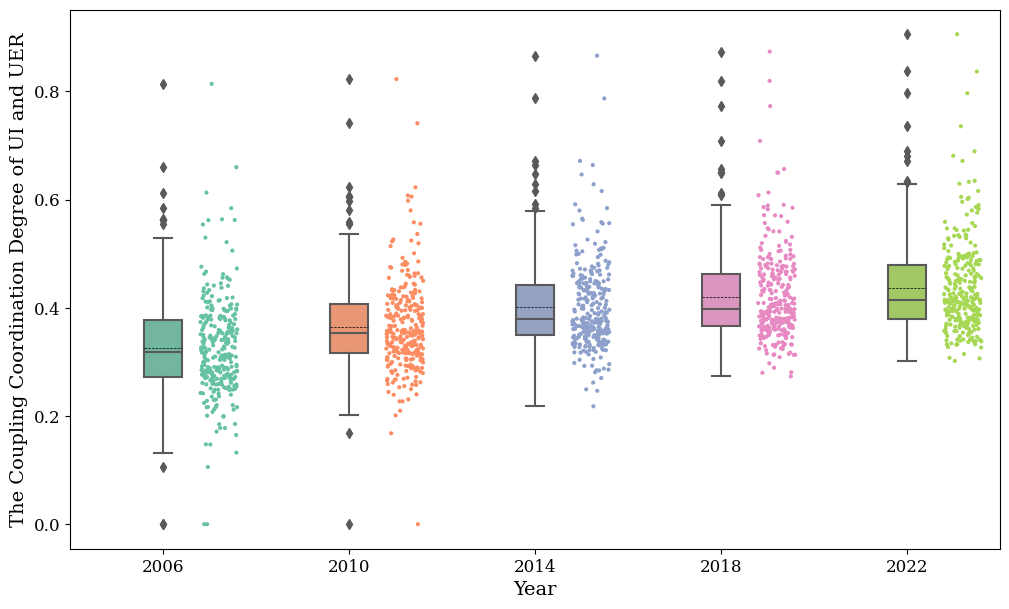

In [35]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 7))

# Create a boxplot with the desired settings
box = sns.boxplot(x='Year', y='D2', data=merged_df, palette="Set2", width=0.2, showmeans=True,
                  meanline=True, meanprops={'color': 'black', 'linewidth': 0.5})

# Overlay with a stripplot to show the points
strip = sns.stripplot(x='Year', y='D2', data=merged_df, palette="Set2", size=3, jitter=True)

# Adjust the positions of the boxplot (left)
current_positions = [patch.get_x() for patch in box.artists]
for i, box_artist in enumerate(box.artists):
    box_artist.set_x(current_positions[i] - 0.3)  # Shift box to the left
    for j in range(6*i, 6*(i+1)):
         line = box.lines[j]
         line.set_xdata(line.get_xdata() - 0.3)  # Shift lines to the left

# Adjust the positions of the stripplot (right) by increasing the x value
for i, strip in enumerate(strip.collections):
    strip.set_offsets([(x + 0.30, y) for x, y in strip.get_offsets()])  # Shift points to the right

# Set the edgecolor and linewidth for boxplot to match the fill color
for patch in box.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_edgecolor((r, g, b))
    patch.set_linewidth(3)

# Set plot title and labels with a different serif font
plt.xlabel('Year', fontname='DejaVu Serif', fontsize=14)
plt.ylabel('The Coupling Coordination Degree of UI and UER', fontname='DejaVu Serif', fontsize=14)

# Customize the ticks' font to a different serif font
plt.xticks(fontname='DejaVu Serif', fontsize=12)
plt.yticks(fontname='DejaVu Serif', fontsize=12)

# Save the plot
plt.savefig("d_values_by_year.png", dpi=300, bbox_inches='tight')

# Show plot
plt.show()

## Calculation of D2 statistics

In [36]:
# Select the D2 column data for the specified year
years = [2006, 2010, 2014, 2018, 2022]
filtered_df = merged_df[merged_df['Year'].isin(years)]

# Initialize the dictionary that stores the results
results = {}

for year in years:
    year_data = filtered_df[filtered_df['Year'] == year]['D2']
    mean_D2_year = year_data.mean()
    std_D2_year = year_data.std()
    cv_D2_year = (std_D2_year / mean_D2_year) * 100
    max_D2_year = year_data.max()  
    min_D2_year = year_data.min() 

    results[year] = {
        'Average D2': mean_D2_year,
        'Standard Deviation of D2': std_D2_year,
        'Coefficient of Variation (CV) of D2': cv_D2_year,
        'Max D2': max_D2_year,  
        'Min D2': min_D2_year   
    }

    print(f"Year: {year}")
    print(f"  Average D2: {mean_D2_year}")
    print(f"  Standard Deviation of D2: {std_D2_year}")
    print(f"  Coefficient of Variation (CV) of D2: {cv_D2_year}%")
    print(f"  Max D2: {max_D2_year}")
    print(f"  Min D2: {min_D2_year}")
    print()

mean_D2_all = filtered_df['D2'].mean()
std_D2_all = filtered_df['D2'].std()
cv_D2_all = (std_D2_all / mean_D2_all) * 100
max_D2_all = filtered_df['D2'].max()  
min_D2_all = filtered_df['D2'].min()  

print("Overall:")
print(f"  Average D2: {mean_D2_all}")
print(f"  Standard Deviation of D2: {std_D2_all}")
print(f"  Coefficient of Variation (CV) of D2: {cv_D2_all}%")
print(f"  Max D2: {max_D2_all}")
print(f"  Min D2: {min_D2_all}")

Year: 2006
  Average D2: 0.32656597987529074
  Standard Deviation of D2: 0.0908249682140771
  Coefficient of Variation (CV) of D2: 27.81213408964443%
  Max D2: 0.8139010940069812
  Min D2: 0.0

Year: 2010
  Average D2: 0.36517188397497524
  Standard Deviation of D2: 0.08407846304981555
  Coefficient of Variation (CV) of D2: 23.02435284299635%
  Max D2: 0.8228193439781849
  Min D2: 0.0

Year: 2014
  Average D2: 0.401228676982037
  Standard Deviation of D2: 0.08092073454224169
  Coefficient of Variation (CV) of D2: 20.16823302634086%
  Max D2: 0.8660864416310142
  Min D2: 0.2180475602055914

Year: 2018
  Average D2: 0.4208097650099637
  Standard Deviation of D2: 0.08290277444499779
  Coefficient of Variation (CV) of D2: 19.70077249586517%
  Max D2: 0.8735660707221585
  Min D2: 0.27333682203889403

Year: 2022
  Average D2: 0.43727737963868263
  Standard Deviation of D2: 0.08599282218590588
  Coefficient of Variation (CV) of D2: 19.665508940105887%
  Max D2: 0.9056991760280413
  Min D2: 0.

## Calculation of UI and UER statistics for time-varying descriptions

In [37]:
# Select column data for the specified year
years = [2006, 2010, 2014, 2018, 2022]
filtered_df = merged_df[merged_df['Year'].isin(years)]

results_UI = {}
results_UER = {}

for year in years:
    # UI
    ui_year_data = filtered_df[filtered_df['Year'] == year]['UI']
    mean_UI_year = ui_year_data.mean()
    std_UI_year = ui_year_data.std()
    cv_UI_year = (std_UI_year / mean_UI_year) * 100
    max_UI_year = ui_year_data.max()  
    min_UI_year = ui_year_data.min()  

    results_UI[year] = {
        'Average UI': mean_UI_year,
        'Standard Deviation of UI': std_UI_year,
        'Coefficient of Variation (CV) of UI': cv_UI_year,
        'Max UI': max_UI_year,  
        'Min UI': min_UI_year   
    }

    # UER
    uer_year_data = filtered_df[filtered_df['Year'] == year]['UER']
    mean_UER_year = uer_year_data.mean()
    std_UER_year = uer_year_data.std()
    cv_UER_year = (std_UER_year / mean_UER_year) * 100
    max_UER_year = uer_year_data.max()  
    min_UER_year = uer_year_data.min()  

    results_UER[year] = {
        'Average UER': mean_UER_year,
        'Standard Deviation of UER': std_UER_year,
        'Coefficient of Variation (CV) of UER': cv_UER_year,
        'Max UER': max_UER_year,  
        'Min UER': min_UER_year   
    }

    print(f"Year: {year}")
    print("  UI:")
    print(f"    Average UI: {mean_UI_year}")
    print(f"    Standard Deviation of UI: {std_UI_year}")
    print(f"    Coefficient of Variation (CV) of UI: {cv_UI_year}%")
    print(f"    Max UI: {max_UI_year}")
    print(f"    Min UI: {min_UI_year}")
    print("  UER:")
    print(f"    Average UER: {mean_UER_year}")
    print(f"    Standard Deviation of UER: {std_UER_year}")
    print(f"    Coefficient of Variation (CV) of UER: {cv_UER_year}%")
    print(f"    Max UER: {max_UER_year}")
    print(f"    Min UER: {min_UER_year}")
    print()

mean_UI_all = filtered_df['UI'].mean()
std_UI_all = filtered_df['UI'].std()
cv_UI_all = (std_UI_all / mean_UI_all) * 100
max_UI_all = filtered_df['UI'].max()  
min_UI_all = filtered_df['UI'].min()  

mean_UER_all = filtered_df['UER'].mean()
std_UER_all = filtered_df['UER'].std()
cv_UER_all = (std_UER_all / mean_UER_all) * 100
max_UER_all = filtered_df['UER'].max()  
min_UER_all = filtered_df['UER'].min()  

print("Overall:")
print("  UI:")
print(f"    Average UI: {mean_UI_all}")
print(f"    Standard Deviation of UI: {std_UI_all}")
print(f"    Coefficient of Variation (CV) of UI: {cv_UI_all}%")
print(f"    Max UI: {max_UI_all}")
print(f"    Min UI: {min_UI_all}")
print("  UER:")
print(f"    Average UER: {mean_UER_all}")
print(f"    Standard Deviation of UER: {std_UER_all}")
print(f"    Coefficient of Variation (CV) of UER: {cv_UER_all}%")
print(f"    Max UER: {max_UER_all}")
print(f"    Min UER: {min_UER_all}")


Year: 2006
  UI:
    Average UI: 0.03912445052962926
    Standard Deviation of UI: 0.04634252701857835
    Coefficient of Variation (CV) of UI: 118.44901689669169%
    Max UI: 0.6059344106370086
    Min UI: 0.008859039805655326
  UER:
    Average UER: 0.07077003048022205
    Standard Deviation of UER: 0.016548399761272214
    Coefficient of Variation (CV) of UER: 23.3833441203575%
    Max UER: 0.11923129865517534
    Min UER: 0.00038398710320609343

Year: 2010
  UI:
    Average UI: 0.04634876779693608
    Standard Deviation of UI: 0.05133814114985629
    Coefficient of Variation (CV) of UI: 110.76484573393566%
    Max UI: 0.586448784303523
    Min UI: 0.012145034389022667
  UER:
    Average UER: 0.08349870124005572
    Standard Deviation of UER: 0.012903288046083896
    Coefficient of Variation (CV) of UER: 15.45327993663927%
    Max UER: 0.10965199520421852
    Min UER: 0.00038398710320609343

Year: 2014
  UI:
    Average UI: 0.0578146376592221
    Standard Deviation of UI: 0.06313633

## Tabulation of UER and UI for major cities

In [38]:
# City Code
selected_citycodes = [
    110000, 120000, 130100, 140100, 150100, 210100, 220100, 230100,
    310000, 320100, 330100, 340100, 350100, 360100, 370100, 410100,
    420100, 430100, 440100, 450100, 460000, 500000, 510100, 520100,
    530100, 540000, 610100, 620100, 630000, 640100, 650000
]

# Select Year
selected_years = [2006, 2010, 2014, 2018, 2022]

# Filtering data
filtered_df = merged_df[(merged_df['Citycode'].isin(selected_citycodes)) & (merged_df['Year'].isin(selected_years))]

# To ensure that the city name is unique and correct, the first occurrence of the name will be used
name_map = filtered_df.drop_duplicates(subset=['Citycode'])[['Citycode', 'Name_of_Regions_y']].set_index('Citycode')['Name_of_Regions_y'].to_dict()

# Calculate UI Forms
ui_df = filtered_df.pivot_table(index='Citycode', columns='Year', values='UI')
ui_df['Changing Rate'] = ui_df.pct_change(axis='columns').mean(axis=1)
ui_df.reset_index(inplace=True)
ui_df['Name_of_Regions_y'] = ui_df['Citycode'].map(name_map)

# Calculation of UER tables
uer_df = filtered_df.pivot_table(index='Citycode', columns='Year', values='UER')
uer_df['Changing Rate'] = uer_df.pct_change(axis='columns').mean(axis=1)
uer_df.reset_index(inplace=True)
uer_df['Name_of_Regions_y'] = uer_df['Citycode'].map(name_map)

# Reorder the columns so that the city name column is at the top
ui_df = ui_df[['Name_of_Regions_y', 'Citycode'] + [col for col in ui_df.columns if col not in ['Name_of_Regions_y', 'Citycode']]]
uer_df = uer_df[['Name_of_Regions_y', 'Citycode'] + [col for col in uer_df.columns if col not in ['Name_of_Regions_y', 'Citycode']]]

In [39]:
ui_df

Year,Name_of_Regions_y,Citycode,2006,2010,2014,2018,2022,Changing Rate
0,Beijing,110000.0,0.122969,0.127777,0.158447,0.173303,0.190717,0.118343
1,Tianjin,120000.0,0.099353,0.122482,0.158331,0.185176,0.203812,0.198918
2,Shijiazhuang,130100.0,0.043265,0.052492,0.064790,0.077165,0.082122,0.175697
3,Taiyuan,140100.0,0.074137,0.083790,0.104487,0.123134,0.137258,0.167596
4,Huhehaote,150100.0,0.039198,0.041733,0.054810,0.058559,0.063319,0.131930
5,Shenyang,210100.0,0.071278,0.082874,0.102775,0.107555,0.118985,0.138903
6,Changchun,220100.0,0.045063,0.058159,0.065451,0.074307,0.077674,0.149152
7,Haerbin,230100.0,0.035039,0.037158,0.040949,0.044083,0.046516,0.073556
8,Shanghai,310000.0,0.248184,0.208318,0.233359,0.279278,0.316646,0.072538
9,Nanjing,320100.0,0.151149,0.173068,0.224325,0.260045,0.296708,0.185351


In [40]:
uer_df 

Year,Name_of_Regions_y,Citycode,2006,2010,2014,2018,2022,Changing Rate
0,Beijing,110000.0,0.086232,0.092644,0.103633,0.097380,0.095516,0.028373
1,Tianjin,120000.0,0.063825,0.085224,0.090662,0.089173,0.090519,0.099438
2,Shijiazhuang,130100.0,0.084484,0.096583,0.094180,0.097431,0.094638,0.031046
3,Taiyuan,140100.0,0.073686,0.078924,0.086843,0.084847,0.085097,0.037845
4,Huhehaote,150100.0,0.073126,0.086303,0.089573,0.086183,0.090533,0.057678
5,Shenyang,210100.0,0.088877,0.094683,0.095626,0.092187,0.094275,0.015495
6,Changchun,220100.0,0.090964,0.092686,0.095324,0.093996,0.096311,0.014522
7,Haerbin,230100.0,0.072256,0.084575,0.086655,0.088326,0.088787,0.054896
8,Shanghai,310000.0,0.078595,0.085316,0.085293,0.087939,0.087944,0.029080
9,Nanjing,320100.0,0.093501,0.091690,0.096249,0.098443,0.099428,0.015789


# 4.Tapiot decoupling model Calculating decoupling values

In [41]:
# 4.Tapiot decoupling model Calculating decoupling values
df_merged2 = merged_df.copy()

# Functions to calculate growth rates and decoupling indices
def calculate_deltas(df):
    df = df.sort_values(by='Year')
    df['Delta_UER'] = df['UER'].pct_change()
    df['Delta_UI'] = df['UI'].pct_change()
    df['DI'] = df['Delta_UER'] / df['Delta_UI']
    return df

# Grouping calculations for each Citycode
df_merged2 = df_merged2.groupby('Citycode').apply(calculate_deltas)

# Delete the growth rates for the first year as they are NaN
#df_merged2 = df_merged2.dropna(subset=['Delta_UER', 'Delta_UI'])

In [42]:
# Reset the index to make sure 'Citycode' exists as a column
df_merged2 = df_merged2.reset_index(drop=True)

In [43]:
# Calculation of decoupling values for 2006-2022
def calculate_long_term_deltas(df):
    first_year = df[df['Year'] == 2006]
    last_year = df[df['Year'] == 2022]

    if not first_year.empty and not last_year.empty:
        first_UER = first_year['UER'].values[0]
        last_UER = last_year['UER'].values[0]
        first_UI = first_year['UI'].values[0]
        last_UI = last_year['UI'].values[0]

        delta_UER_long = (last_UER - first_UER) / first_UER
        delta_UI_long = (last_UI - first_UI) / first_UI
        DI_long = delta_UER_long / delta_UI_long

        return pd.Series({
            'Year': 2022,
            'Delta_UER_l': delta_UER_long,
            'Delta_UI_l': delta_UI_long,
            'DI_long': DI_long
        })
    else:
        return pd.Series({
            'Year': 2022,
            'Delta_UER_l': np.nan,
            'Delta_UI_l': np.nan,
            'DI_long': np.nan
        })

# Add decoupling values for 2006-2022
long_term_deltas = df_merged2.groupby('Citycode').apply(calculate_long_term_deltas)
long_term_deltas = long_term_deltas.reset_index()

# Merge long-term decoupled values back into the original data frame
df_merged2 = pd.merge(df_merged2, long_term_deltas, on=['Citycode', 'Year'], how='left')

In [44]:
df_merged2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name_of_Regions_x  1452 non-null   object 
 1   Year               1452 non-null   int64  
 2   Citycode           1452 non-null   float64
 3   UI                 1452 non-null   float64
 4   Name_of_Regions_y  1452 non-null   object 
 5   UER                1452 non-null   float64
 6   C                  1452 non-null   float64
 7   T                  1452 non-null   float64
 8   D                  1452 non-null   float64
 9   UI_normalized      1452 non-null   float64
 10  UER_normalized     1452 non-null   float64
 11  C2                 1452 non-null   float64
 12  T2                 1452 non-null   float64
 13  D2                 1452 non-null   float64
 14  Delta_UER          1160 non-null   float64
 15  Delta_UI           1160 non-null   float64
 16  DI                 1160 

In [45]:
# Define the classification function
def classify_decoupling_short(row):
    Delta_ER = row['Delta_UER']
    Delta_UI = row['Delta_UI']
    DI = row['DI']
    
    if not pd.isna(DI):
        if Delta_ER < 0 and Delta_UI < 0 and 1.2 <= DI < float('inf'):
            return 'Recession decoupling / Decoupling'
        elif Delta_ER < 0 and Delta_UI > 0 and float('-inf') < DI < 0:
            return 'Strong decoupling / Decoupling'
        elif Delta_ER > 0 and Delta_UI > 0 and 0 <= DI < 0.8:
            return 'Weak decoupling / Decoupling'
        elif Delta_ER > 0 and Delta_UI > 0 and 0.8 <= DI < 1.2:
            return 'Expansion connection / Connection'
        elif Delta_ER < 0 and Delta_UI < 0 and 0.8 <= DI < 1.2:
            return 'Recession connection / Connection'
        elif Delta_ER > 0 and Delta_UI > 0 and 1.2 <= DI < float('inf'):
            return 'Negative decoupling of expansion / Negative decoupling'
        elif Delta_ER > 0 and Delta_UI < 0 and float('-inf') < DI < 0:
            return 'Strong negative decoupling / Negative decoupling'
        elif Delta_ER < 0 and Delta_UI < 0 and 0 <= DI < 0.8:
            return 'Weak negative decoupling / Negative decoupling'
        else:
            return 'Unknown'
    return 'Unknown'

def classify_decoupling_long(row):
    Delta_ER = row['Delta_UER_l']
    Delta_UI = row['Delta_UI_l']
    DI_long = row['DI_long']
    
    if not pd.isna(DI_long):
        if Delta_ER < 0 and Delta_UI < 0 and 1.2 <= DI_long < float('inf'):
            return 'Recession decoupling / Decoupling'
        elif Delta_ER < 0 and Delta_UI > 0 and float('-inf') < DI_long < 0:
            return 'Strong decoupling / Decoupling'
        elif Delta_ER > 0 and Delta_UI > 0 and 0 <= DI_long < 0.8:
            return 'Weak decoupling / Decoupling'
        elif Delta_ER > 0 and Delta_UI > 0 and 0.8 <= DI_long < 1.2:
            return 'Expansion connection / Connection'
        elif Delta_ER < 0 and Delta_UI < 0 and 0.8 <= DI_long < 1.2:
            return 'Recession connection / Connection'
        elif Delta_ER > 0 and Delta_UI > 0 and 1.2 <= DI_long < float('inf'):
            return 'Negative decoupling of expansion / Negative decoupling'
        elif Delta_ER > 0 and Delta_UI < 0 and float('-inf') < DI_long < 0:
            return 'Strong negative decoupling / Negative decoupling'
        elif Delta_ER < 0 and Delta_UI < 0 and 0 <= DI_long < 0.8:
            return 'Weak negative decoupling / Negative decoupling'
        else:
            return 'Unknown'
    return 'Unknown'

# Apply the classification function to each row
df_merged2['DI_C_Short'] = df_merged2.apply(classify_decoupling_short, axis=1)
df_merged2['DI_C_Long'] = df_merged2.apply(classify_decoupling_long, axis=1)


In [46]:
df_merged2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name_of_Regions_x  1452 non-null   object 
 1   Year               1452 non-null   int64  
 2   Citycode           1452 non-null   float64
 3   UI                 1452 non-null   float64
 4   Name_of_Regions_y  1452 non-null   object 
 5   UER                1452 non-null   float64
 6   C                  1452 non-null   float64
 7   T                  1452 non-null   float64
 8   D                  1452 non-null   float64
 9   UI_normalized      1452 non-null   float64
 10  UER_normalized     1452 non-null   float64
 11  C2                 1452 non-null   float64
 12  T2                 1452 non-null   float64
 13  D2                 1452 non-null   float64
 14  Delta_UER          1160 non-null   float64
 15  Delta_UI           1160 non-null   float64
 16  DI                 1160 

In [47]:
# Export df_merged2 as CSV file
df_merged2.to_csv("data/Panel_data_calculation_results817.csv", index=False)

In [56]:
# use shapefile
shapefile_path = 'data/Chinamap_2019/Merged_Municipalities.shp'
gdf = gpd.read_file(shapefile_path)

In [57]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Prvnc_c   317 non-null    float64 
 1   City_cd   317 non-null    object  
 2   Area      317 non-null    object  
 3   Name      286 non-null    object  
 4   geometry  317 non-null    geometry
dtypes: float64(1), geometry(1), object(3)
memory usage: 12.5+ KB


In [80]:
# Ensure that column types are consistent
df_merged2['Citycode'] = df_merged2['Citycode'].astype(float)
gdf['City_cd'] = gdf['City_cd'].astype(float)


In [81]:
# Extend shapefile data to apply to multiple years
expanded_gdf = gdf.loc[gdf.index.repeat(len(df_merged2['Year'].unique()))].reset_index(drop=True)
expanded_gdf['Year'] = list(df_merged2['Year'].unique()) * len(gdf)

# Reset the index to make sure 'Citycode' exists as a column
df_merged2 = df_merged2.reset_index(drop=True)

# Consolidation of data
merged_gdf = pd.merge(expanded_gdf, df_merged2, left_on=['City_cd', 'Year'], right_on=['Citycode', 'Year'], how='outer')

# Convert merged data to GeoDataFrame
merged_gdf = gpd.GeoDataFrame(merged_gdf, geometry='geometry')

In [82]:
merged_gdf

,Prvnc_c,City_cd,Area,Name,geometry,Year,Name_of_Regions_x,Citycode,UI,Name_of_Regions_y,...,T2,D2,Delta_UER,Delta_UI,DI,Delta_UER_l,Delta_UI_l,DI_long,DI_C_Short,DI_C_Long
0,460000.0,460000.0,0,Hainan,"MULTIPOLYGON (((509245.473 1880004.210, 509230...",2006,Hainan,460000.0,0.036758,Hainan,...,0.312811,0.360176,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown
1,460000.0,460000.0,0,Hainan,"MULTIPOLYGON (((509245.473 1880004.210, 509230...",2010,海南,460000.0,0.029331,海南,...,0.328892,0.338755,0.066066,-0.202051,-0.326976,NaN,NaN,NaN,Strong negative decoupling / Negative decoupling,Unknown
2,460000.0,460000.0,0,Hainan,"MULTIPOLYGON (((509245.473 1880004.210, 509230...",2014,海南,460000.0,0.037790,海南,...,0.344228,0.372514,0.034579,0.288394,0.119902,NaN,NaN,NaN,Weak decoupling / Decoupling,Unknown
3,460000.0,460000.0,0,Hainan,"MULTIPOLYGON (((509245.473 1880004.210, 509230...",2018,海南,460000.0,0.040469,海南,...,0.332934,0.377147,-0.038200,0.070886,-0.538893,NaN,NaN,NaN,Strong decoupling / Decoupling,Unknown
4,460000.0,460000.0,0,Hainan,"MULTIPOLYGON (((509245.473 1880004.210, 509230...",2022,海南,460000.0,0.052890,海南,...,0.356599,0.415235,0.054630,0.306929,0.177988,0.118748,0.438862,0.270582,Weak decoupling / Decoupling,Weak decoupling / Decoupling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,NaN,NaN,NaN,NaN,None,2006,Kelamayi,650200.0,0.054265,Kelamayi,...,0.297191,0.398218,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown
1610,NaN,NaN,NaN,NaN,None,2010,克拉玛依,650200.0,0.048333,克拉玛依,...,0.344188,0.400958,0.181323,-0.109324,-1.658589,NaN,NaN,NaN,Strong negative decoupling / Negative decoupling,Unknown
1611,NaN,NaN,NaN,NaN,None,2014,克拉玛依,650200.0,0.047202,克拉玛依,...,0.369373,0.405734,0.079078,-0.023397,-3.379868,NaN,NaN,NaN,Strong negative decoupling / Negative decoupling,Unknown
1612,NaN,NaN,NaN,NaN,None,2018,克拉玛依,650200.0,0.050384,克拉玛依,...,0.368586,0.413192,-0.006809,0.067404,-0.101015,NaN,NaN,NaN,Strong decoupling / Decoupling,Unknown


In [83]:
# Find rows where Name_of_Regions_x_2010 has a value but the Name column has no value.
rows_with_value_in_Regions_but_not_in_Name = merged_gdf[(merged_gdf['Name_of_Regions_x'].notna()) & (merged_gdf['Name'].isna())]

# Outputs the eligible rows
print(rows_with_value_in_Regions_but_not_in_Name)

      Prvnc_c  City_cd Area Name geometry  Year Name_of_Regions_x  Citycode  \
1585      NaN      NaN  NaN  NaN     None  2006            Haikou  460100.0   
1586      NaN      NaN  NaN  NaN     None  2010                海口  460100.0   
1587      NaN      NaN  NaN  NaN     None  2014                海口  460100.0   
1588      NaN      NaN  NaN  NaN     None  2018                海口  460100.0   
1589      NaN      NaN  NaN  NaN     None  2006             Sanya  460200.0   
1590      NaN      NaN  NaN  NaN     None  2010                三亚  460200.0   
1591      NaN      NaN  NaN  NaN     None  2014                三亚  460200.0   
1592      NaN      NaN  NaN  NaN     None  2018                三亚  460200.0   
1593      NaN      NaN  NaN  NaN     None  2022                三亚  460200.0   
1594      NaN      NaN  NaN  NaN     None  2006              Lasa  540100.0   
1595      NaN      NaN  NaN  NaN     None  2010                拉萨  540100.0   
1596      NaN      NaN  NaN  NaN     None  2014     

In [84]:
# Remove rows with null geometry columns
merged_gdf = merged_gdf.dropna(subset=['geometry'])

In [85]:
# Finds rows where the geometry column is null
rows_with_nan_in_geometry = merged_gdf[merged_gdf['geometry'].isna()]

# Outputs rows containing null geometry columns
print(rows_with_nan_in_geometry)

Empty GeoDataFrame
Columns: [Prvnc_c, City_cd, Area, Name, geometry, Year, Name_of_Regions_x, Citycode, UI, Name_of_Regions_y, UER, C, T, D, UI_normalized, UER_normalized, C2, T2, D2, Delta_UER, Delta_UI, DI, Delta_UER_l, Delta_UI_l, DI_long, DI_C_Short, DI_C_Long]
Index: []

[0 rows x 27 columns]


In [64]:
merged_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1585 entries, 0 to 1584
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Prvnc_c            1585 non-null   float64 
 1   City_cd            1585 non-null   float64 
 2   Area               1585 non-null   object  
 3   Name               1430 non-null   object  
 4   geometry           1585 non-null   geometry
 5   Year               1585 non-null   int64   
 6   Name_of_Regions_x  1423 non-null   object  
 7   Citycode           1423 non-null   float64 
 8   UI                 1423 non-null   float64 
 9   Name_of_Regions_y  1423 non-null   object  
 10  UER                1423 non-null   float64 
 11  C                  1423 non-null   float64 
 12  T                  1423 non-null   float64 
 13  D                  1423 non-null   float64 
 14  UI_normalized      1423 non-null   float64 
 15  UER_normalized     1423 non-null   float64 
 16  C2 

In [379]:
# Save the merged data as a new shapefile
merged_gdf.to_file("data/Chinamap_2019/merged_Municipalities_with_data730.shp")

/tmp/ipykernel_6412/3429696294.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  merged_gdf.to_file("data/Chinamap_2019/merged_Municipalities_with_data730.shp")


## Number of each decoupling type as a proportion of the total number of all its types and change from 2006 to 2022

In [88]:
selected_years = [2010, 2014, 2018, 2022]
filtered_df = merged_gdf[(merged_gdf['Year'].isin(selected_years)) & (merged_gdf['DI_C_Short'] != 'Unknown')]

type_counts_by_year = filtered_df.groupby(['Year', 'DI_C_Short']).size().unstack(fill_value=0)

years_range = list(range(2006, 2023))  
filtered_long_df = merged_gdf[(merged_gdf['Year'].isin(years_range)) & (merged_gdf['DI_C_Short'] != 'Unknown')]
type_counts_by_year_long = filtered_long_df.groupby(['Year', 'DI_C_Short']).size().unstack(fill_value=0)

change_amount = type_counts_by_year_long.diff().sum()  

overall_long_counts = merged_gdf[(merged_gdf['DI_C_Long'] != 'Unknown')].groupby('DI_C_Long').size()

results_df = type_counts_by_year.transpose()

results_df['2006-2022 (Long-Term)'] = overall_long_counts.reindex(results_df.index, fill_value=0)

results_df['变化量 Change'] = change_amount.reindex(results_df.index, fill_value=0).apply(lambda x: f"{x:+.0f}")  

results_df.columns = [f"{year}" for year in selected_years] + ['Overall', 'Change']

results_df.index.name = 'Decoupling types'

In [89]:
results_df

,2010,2014,2018,2022,Overall,Change
Decoupling types,,,,,,
Expansion connection / Connection,34,9,22,20,21,-14
Negative decoupling of expansion / Negative decoupling,98,35,27,30,36,-68
Recession connection / Connection,0,1,0,0,0,+0
Recession decoupling / Decoupling,0,1,3,0,0,+0
Strong decoupling / Decoupling,27,69,82,41,2,+14
Strong negative decoupling / Negative decoupling,11,7,3,22,4,+11
Weak decoupling / Decoupling,112,160,145,170,220,+58
Weak negative decoupling / Negative decoupling,1,1,3,2,0,+1


In [ ]:
# 5. Calculation of coupled harmonized values of UI and UER for 2026-2034 using Grey prediction model

In [90]:

#Constructing the original non-negative time data series
def gm11_forecast(x0, n_forecast):
    # Smoothing of data to reduce the effects of noise and outliers
    x0_smooth = uniform_filter1d(x0, size=3)
    #Accumulate on top of the original sequence to get the cumulative sequence
    def accumu(lis):
        total = 0
        for x in lis:
            total += x
            yield total

    x1 = list(accumu(x0_smooth)) #x1 is the cumulative sequence
    #Modeling the GM(1,1) gray differential equation
    def avg(lis):
        pre = lis[0]
        for x in lis:
            avgVal = (pre + x) / 2
            pre = x
            yield avgVal
    #avg function is used to compute the sequence of immediate neighboring means
    #z1 is the sequence of negative means for the subsequent computation of the matrix 𝐵
    z1 = [x * -1 for x in list(avg(x1))]
    z1 = np.delete(z1, 0)

    B = pd.DataFrame({'0': z1})
    B['1'] = 1
    B_ = B.to_numpy()
    B_t = B.transpose().to_numpy()

    E1_pre = B_t.dot(B_)   #E1_pre is the result of the matrix 𝐵𝑇𝐵
    E1 = np.linalg.pinv(E1_pre)  # Using pseudo-inversion E1 is the pseudo-inversion of E1_pre
    Xn = np.delete(x0_smooth, 0)  #Xn is the portion of the vector Y original data sequence 𝑋(0) after the first element is removed
    E2 = B_t.dot(Xn)          #E2 is the result of the matrix 𝐵𝑇𝑌.
    parameter = E1.dot(E2)    #parameter are the final parameter estimates 𝜇^
    a = parameter.item(0)
    b = parameter.item(1)
#Predictions based on the formula
    if a == 0:
        raise ValueError("Parameter 'a' resulted in zero, which can lead to division by zero errors.")
#dif_eq function implements the solution of the whitened differential equation.
    def dif_eq(k):
        return (x0_smooth[0] - (b / a)) * math.exp(-1 * a * (k)) + (b / a)
#x_forecast function generates the predicted values by accumulating them. The function internally iterates over the sequence:
    def x_forecast(n_forecast):
        forecast = []
        for k in range(len(x0_smooth) + n_forecast):
            forecast.append(dif_eq(k) - dif_eq(k - 1) if k != 0 else x0_smooth[0])
        return forecast

    forecast_values = x_forecast(n_forecast)

    # Calculate the a posteriori difference ratio C and the small error probability P
    x0_mean = np.mean(x0_smooth)
    S1_sq = np.var(x0_smooth)

    def residual():
        for K in range(len(x0_smooth)):
            res_val = x0_smooth[K] - forecast_values[K]
            yield res_val

    S2_sq = np.var(list(residual()))
    C = math.sqrt(S2_sq) / math.sqrt(S1_sq)

    sigma_x0 = np.std(x0_smooth)
    small_error_threshold = 0.6745 * sigma_x0
    residuals = np.abs(np.array(list(residual())))
    P = np.sum(residuals <= small_error_threshold) / len(x0_smooth)

    return forecast_values, a, b, C, P


results = []
city_groups = merged_df.groupby('Citycode')

# Projected data for the next 3 years
future_years = [2026, 2030, 2034]

for city, group in city_groups:
    for col in ['D2']:
        data = group[col].values
        
        # Construction of GM(1,1) model and prediction
        try:
            forecast_values, a, b, C, P = gm11_forecast(data, len(future_years))
        except ValueError as e:
            print(f"Error processing Citycode {city}, Metric {col}: {e}")
            continue
        
        # Save historical data forecasts
        for year, value in zip(group['Year'], data):
            results.append({
                'Citycode': city,
                'Year': year,
                'Metric': col,
                'Value': value,
                'a': a,
                'b': b,
                'C': C,
                'P': P
            })
        
        # Saving of forecast data
        for year, value in zip(future_years, forecast_values[len(data):]):
            results.append({
                'Citycode': city,
                'Year': year,
                'Metric': col,
                'Value': value,
                'a': a,
                'b': b,
                'C': C,
                'P': P
            })

results_df = pd.DataFrame(results)

Error processing Citycode 419001.0, Metric D2: Parameter 'a' resulted in zero, which can lead to division by zero errors.


In [91]:
results_df.head(30)

,Citycode,Year,Metric,Value,a,b,C,P
0,110000.0,2006,D2,0.521426,-0.029424,0.527668,0.160850,1.0
1,110000.0,2010,D2,0.536409,-0.029424,0.527668,0.160850,1.0
2,110000.0,2014,D2,0.584287,-0.029424,0.527668,0.160850,1.0
3,110000.0,2018,D2,0.589010,-0.029424,0.527668,0.160850,1.0
4,110000.0,2022,D2,0.601097,-0.029424,0.527668,0.160850,1.0
5,110000.0,2026,D2,0.620076,-0.029424,0.527668,0.160850,1.0
6,110000.0,2030,D2,0.638592,-0.029424,0.527668,0.160850,1.0
7,110000.0,2034,D2,0.657661,-0.029424,0.527668,0.160850,1.0
8,120000.0,2006,D2,0.456224,-0.049284,0.485916,0.165622,1.0
9,120000.0,2010,D2,0.519335,-0.049284,0.485916,0.165622,1.0


In [92]:
# Rows with C ≥ 0.65 and P ≤ 0.70
filtered_results_C = results_df[results_df['C'] < -0.3]
filtered_results_P = results_df[results_df['P'] <= 0.95]

print("Filtered Results - C >= 0.65")
print(filtered_results_C)

print("\nFiltered Results - P <= 0.70")
print(filtered_results_P)

Filtered Results - C >= 0.65
Empty DataFrame
Columns: [Citycode, Year, Metric, Value, a, b, C, P]
Index: []

Filtered Results - P <= 0.70
      Citycode  Year Metric     Value         a         b         C    P
512   231000.0  2006     D2  0.340208 -0.004095  0.349309  0.429927  0.8
513   231000.0  2010     D2  0.355065 -0.004095  0.349309  0.429927  0.8
514   231000.0  2014     D2  0.352616 -0.004095  0.349309  0.429927  0.8
515   231000.0  2018     D2  0.359920 -0.004095  0.349309  0.429927  0.8
516   231000.0  2022     D2  0.351797 -0.004095  0.349309  0.429927  0.8
517   231000.0  2026     D2  0.357245 -0.004095  0.349309  0.429927  0.8
518   231000.0  2030     D2  0.358711 -0.004095  0.349309  0.429927  0.8
519   231000.0  2034     D2  0.360183 -0.004095  0.349309  0.429927  0.8
2299  650000.0  2006     D2  0.340300 -0.025620  0.296107  0.480109  0.8
2300  650000.0  2010     D2  0.281912 -0.025620  0.296107  0.480109  0.8
2301  650000.0  2014     D2  0.317243 -0.025620  0.296107  

# Descriptive analysis of predicted values

In [93]:
statistics = {}

# Get a list of all years
years = results_df['Year'].unique()

# Sort Year List
years.sort()

for year in years:
    year_data = results_df[results_df['Year'] == year]['Value']
    mean_value = year_data.mean()
    median_value = year_data.median()
    std_value = year_data.std()
    
    # Calculate the rate of change
    if year != years[0]:  
        prev_year_data = results_df[results_df['Year'] == year - 4]['Value']
        prev_mean_value = prev_year_data.mean()
        change_rate = ((mean_value - prev_mean_value) / prev_mean_value) * 100
    else:
        change_rate = None  # No rate of change in the first year

    statistics[year] = {
        'Mean': mean_value,
        'Median': median_value,
        'Standard Deviation': std_value,
        'Change Rate (%)': change_rate
    }

    print(f"Year: {year}")
    print(f"  Mean Value: {mean_value}")
    print(f"  Median Value: {median_value}")
    print(f"  Standard Deviation: {std_value}")
    if change_rate is not None:
        print(f"  Change Rate: {change_rate:.2f}%")
    print()

statistics_df = pd.DataFrame(statistics).transpose()
print(statistics_df)

Year: 2006
  Mean Value: 0.3276959659648246
  Median Value: 0.3175058870355377
  Standard Deviation: 0.08891704111405815

Year: 2010
  Mean Value: 0.36643545450776066
  Median Value: 0.3541577338721942
  Standard Deviation: 0.08141934045274592
  Change Rate: 11.82%

Year: 2014
  Mean Value: 0.401228676982037
  Median Value: 0.37887126609982513
  Standard Deviation: 0.08092073454224169
  Change Rate: 9.50%

Year: 2018
  Mean Value: 0.4208097650099637
  Median Value: 0.39871076743647865
  Standard Deviation: 0.08290277444499779
  Change Rate: 4.88%

Year: 2022
  Mean Value: 0.43727737963868263
  Median Value: 0.41525399028948684
  Standard Deviation: 0.08599282218590588
  Change Rate: 3.91%

Year: 2026
  Mean Value: 0.4626510166891215
  Median Value: 0.44366088147544946
  Standard Deviation: 0.08739255689226015
  Change Rate: 5.80%

Year: 2030
  Mean Value: 0.4898210559595885
  Median Value: 0.4688614105144566
  Standard Deviation: 0.0912869557183699
  Change Rate: 5.87%

Year: 2034
  Me

In [99]:
# City Code
selected_citycodes = [
    110000, 120000, 130100, 140100, 150100, 210100, 220100, 230100,
    310000, 320100, 330100, 340100, 350100, 360100, 370100, 410100,
    420100, 430100, 440100, 450100, 460000, 500000, 510100, 520100,
    530100, 540000, 610100, 620100, 630000, 640100, 650000
]

# Selection of years, including forecast years
selected_years = [2006, 2010, 2014, 2018, 2022, 2026, 2030, 2034]

# Filter the data to ensure that the selected city code and year match
filtered_results_df = results_df[(results_df['Citycode'].isin(selected_citycodes)) & (results_df['Year'].isin(selected_years))]

# To ensure that the city name is unique and correct, the first occurrence of the name will be used
name_map = filtered_results_df.drop_duplicates(subset=['Citycode'])[['Citycode']].set_index('Citycode').to_dict()

# Pivot table calculating Value for each year for each city
value_df = filtered_results_df.pivot_table(index='Citycode', columns='Year', values='Value')

# Pivot table calculates a, C, and P values for each city, selecting the last occurrence of year data
a_df = filtered_results_df.drop_duplicates(subset=['Citycode'], keep='last').pivot_table(index='Citycode', columns='Year', values='a', aggfunc='last')
C_df = filtered_results_df.drop_duplicates(subset=['Citycode'], keep='last').pivot_table(index='Citycode', columns='Year', values='C', aggfunc='last')
P_df = filtered_results_df.drop_duplicates(subset=['Citycode'], keep='last').pivot_table(index='Citycode', columns='Year', values='P', aggfunc='last')

# Combine all data into one DataFrame
final_df = pd.concat([value_df, a_df, C_df, P_df], axis=1, keys=['Value', 'a', 'C', 'P'])

# Expanding Multilevel Indexes into Flat Tables
final_df.columns = ['_'.join(map(str, col)).strip() for col in final_df.columns.values]

# Add city name column
final_df['Name_of_Regions_y'] = final_df.index.map(name_map)

# Reorder the columns so that the city name column is at the top
final_df = final_df[['Name_of_Regions_y'] + [col for col in final_df.columns if col != 'Name_of_Regions_y']]

In [100]:
final_df

,Name_of_Regions_y,Value_2006,Value_2010,Value_2014,Value_2018,Value_2022,Value_2026,Value_2030,Value_2034,a_2034,C_2034,P_2034
Citycode,,,,,,,,,,,,
110000.0,NaN,0.521426,0.536409,0.584287,0.589010,0.601097,0.620076,0.638592,0.657661,-0.029424,0.160850,1.0
120000.0,NaN,0.456224,0.519335,0.564892,0.586265,0.603443,0.635993,0.668123,0.701876,-0.049284,0.165622,1.0
130100.0,NaN,0.384404,0.421867,0.446056,0.472923,0.477778,0.501837,0.523763,0.546647,-0.042764,0.155982,1.0
140100.0,NaN,0.435914,0.459058,0.499779,0.519499,0.535251,0.558608,0.583562,0.609631,-0.043703,0.129525,1.0
150100.0,NaN,0.359233,0.382088,0.419356,0.423536,0.438723,0.454996,0.472694,0.491080,-0.038159,0.150561,1.0
210100.0,NaN,0.451841,0.479056,0.509708,0.511350,0.528517,0.541754,0.557369,0.573434,-0.028416,0.143270,1.0
220100.0,NaN,0.396622,0.430470,0.448726,0.463700,0.472427,0.488602,0.504650,0.521226,-0.032318,0.150965,1.0
230100.0,NaN,0.345193,0.366175,0.380181,0.391011,0.398114,0.409288,0.420779,0.432593,-0.027689,0.136863,1.0
310000.0,NaN,0.613048,0.597944,0.615846,0.650144,0.671536,0.684338,0.705258,0.726817,-0.030111,0.096828,1.0


<Figure size 1200x600 with 0 Axes>

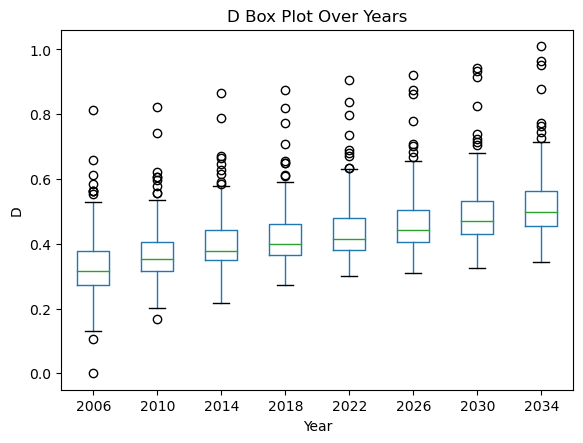

In [95]:
plt.figure(figsize=(12, 6))
boxplot = results_df.boxplot(column='Value', by='Year', grid=False)
plt.title('D Box Plot Over Years')
plt.suptitle('')
plt.xlabel('Year')
plt.ylabel('D')
plt.show()

In [96]:
# Extend shapefile data to apply to multiple years
expanded_gdf2 = gdf.loc[gdf.index.repeat(len(results_df['Year'].unique()))].reset_index(drop=True)
expanded_gdf2['Year'] = list(results_df['Year'].unique()) * len(gdf)

# Consolidation of data
merged_gdf2 = pd.merge(expanded_gdf2, results_df, left_on=['City_cd', 'Year'], right_on=['Citycode', 'Year'], how='outer')

# Convert merged data to GeoDataFrame
merged_gdf2 = gpd.GeoDataFrame(merged_gdf2, geometry='geometry')

In [97]:
# Remove rows with null geometry columns
merged_gdf2 = merged_gdf2.dropna(subset=['geometry'])

In [98]:
merged_gdf2.head(30)

,Prvnc_c,City_cd,Area,Name,geometry,Year,Citycode,Metric,Value,a,b,C,P
0,460000.0,460000.0,0,Hainan,"MULTIPOLYGON (((509245.473 1880004.210, 509230...",2006,460000.0,D2,0.360176,-0.042979,0.330927,0.181626,1.0
1,460000.0,460000.0,0,Hainan,"MULTIPOLYGON (((509245.473 1880004.210, 509230...",2010,460000.0,D2,0.338755,-0.042979,0.330927,0.181626,1.0
2,460000.0,460000.0,0,Hainan,"MULTIPOLYGON (((509245.473 1880004.210, 509230...",2014,460000.0,D2,0.372514,-0.042979,0.330927,0.181626,1.0
3,460000.0,460000.0,0,Hainan,"MULTIPOLYGON (((509245.473 1880004.210, 509230...",2018,460000.0,D2,0.377147,-0.042979,0.330927,0.181626,1.0
4,460000.0,460000.0,0,Hainan,"MULTIPOLYGON (((509245.473 1880004.210, 509230...",2022,460000.0,D2,0.415235,-0.042979,0.330927,0.181626,1.0
5,460000.0,460000.0,0,Hainan,"MULTIPOLYGON (((509245.473 1880004.210, 509230...",2026,460000.0,D2,0.419982,-0.042979,0.330927,0.181626,1.0
6,460000.0,460000.0,0,Hainan,"MULTIPOLYGON (((509245.473 1880004.210, 509230...",2030,460000.0,D2,0.438426,-0.042979,0.330927,0.181626,1.0
7,460000.0,460000.0,0,Hainan,"MULTIPOLYGON (((509245.473 1880004.210, 509230...",2034,460000.0,D2,0.457680,-0.042979,0.330927,0.181626,1.0
8,540000.0,540000.0,0,Tibet,"POLYGON ((-1051759.214 2954966.840, -1051995.7...",2006,540000.0,D2,0.184883,-0.109450,0.195360,0.107542,1.0
9,540000.0,540000.0,0,Tibet,"POLYGON ((-1051759.214 2954966.840, -1051995.7...",2010,540000.0,D2,0.227014,-0.109450,0.195360,0.107542,1.0


In [310]:
# Save the merged data as a new shapefile
merged_gdf2.to_file("data/Chinamap_2019/merged_Municipalities_with_Futuredata_730.shp")